## Import libraries

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
plt.style.use("ggplot")

from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
%matplotlib inline

## Import Data

In [ ]:
df = pd.read_csv('dataset.csv')
for i in range(len(df)):
    df.loc[i,'dastgah'] = df.iloc[i]['dastgah'].replace("D_","")

## Data Normalization & Test Train Split

In [ ]:
features = df.iloc[: , 3:]
labels = df.iloc[: , 1]
labels = labels.astype('int')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=13)

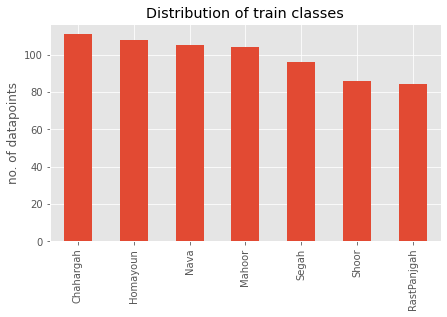

In [ ]:
plt.figure(figsize=(7,4))
y_train_vis = y_train.replace({0:'Shoor',1:'Segah',2:'Mahoor',3:'Homayoun',4:'RastPanjgah',5:'Nava',6:'Chahargah'})
y_train_vis.value_counts().plot(kind='bar')
plt.ylabel('no. of datapoints')
plt.title('Distribution of train classes')
plt.show()

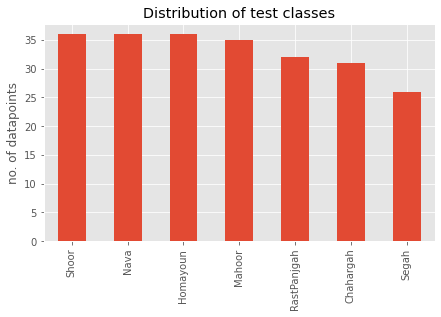

In [ ]:
plt.figure(figsize=(7,4))
y_test_vis = y_test.replace({0:'Shoor',1:'Segah',2:'Mahoor',3:'Homayoun',4:'RastPanjgah',5:'Nava',6:'Chahargah'})
y_test_vis.value_counts().plot(kind='bar')
plt.ylabel('no. of datapoints')
plt.title('Distribution of test classes')
plt.show()

In [ ]:
# sc = StandardScaler()
sc = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

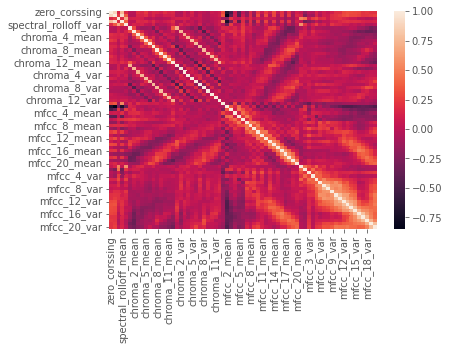

In [ ]:
#Check the Co-relation between features without PCA
sns.heatmap(X_train.corr())

Text(0.5, 1.0, 'Most Important Features Sorted by Fisher Score')

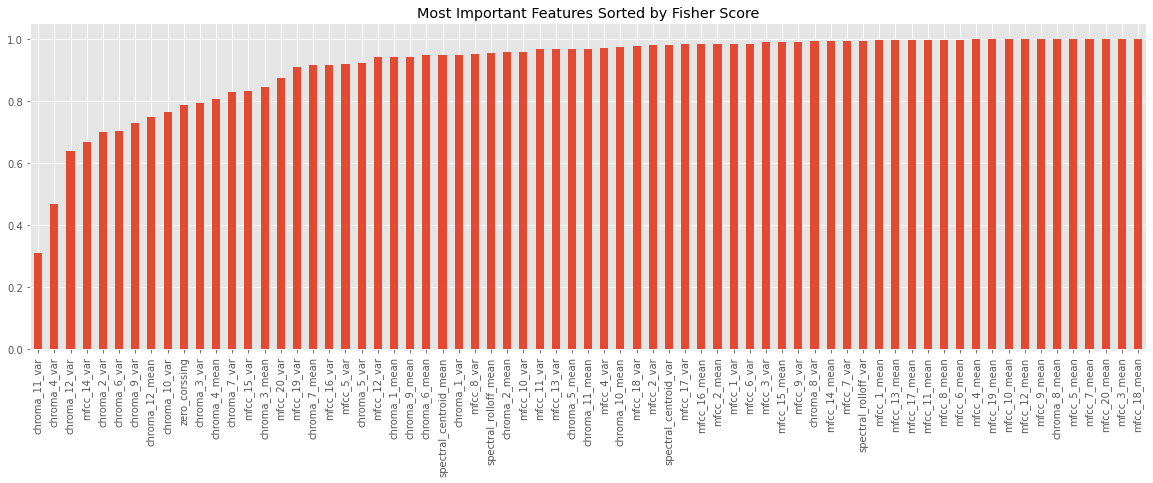

In [ ]:
f_score = chi2(X_train, y_train)
p_values = pd.Series(f_score[1], index=X_train.columns)
p_values.sort_values(ascending=True, inplace=True)
plt.figure(figsize=(20, 6),)
p_values.plot.bar()
plt.title('Most Important Features Sorted by Fisher Score')

##Dimension Reduction with PCA




In [ ]:
n_components = 69
pca = PCA(n_components=n_components)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n_components)])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n_components)])

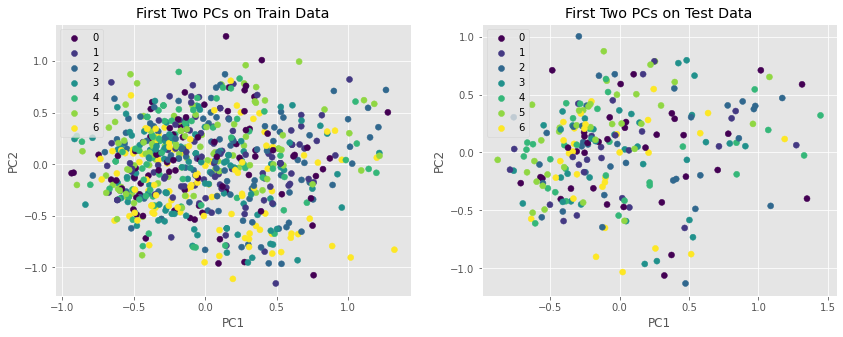

In [ ]:
fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plot = plt.scatter(X_train_pca.iloc[:,0], X_train_pca.iloc[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_train)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("First Two PCs on Train Data")

fig.add_subplot(122)
plot = plt.scatter(X_test_pca.iloc[:,0], X_test_pca.iloc[:,1], c=y_test)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_test)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("First Two PCs on Test Data")

plt.show()

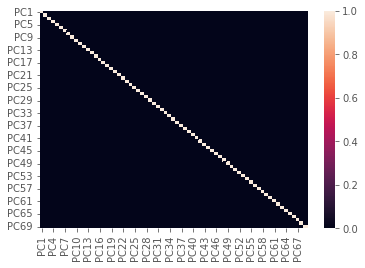

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(X_train_pca.corr())

##Classification

#SVM

In [ ]:
# SVM without PCA and finding the best C
accs = []
for c in range(1, 100):
    clf_SVM = SVC(kernel='rbf', C=c).fit(X_train, y_train)
    accs.append(np.mean(cross_val_score(clf_SVM, X_train, y_train, cv=5)))
best_C = np.argmax(accs)+1
print('best C:', best_C)

clf_SVM = SVC(kernel='rbf', C=best_C).fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)
print("accuracy without= %0.2f" % accuracy_score(y_test, y_pred_SVM))

best C: 6
accuracy without= 0.45


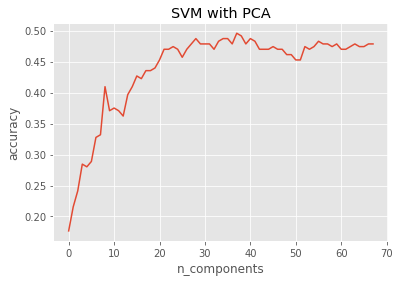

max accuracy with PCA = 0.50


In [ ]:
# SVM with PCA
accs = []
for n in range(1,len(X_train.columns)):
    pca = PCA(n_components=n)
    X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
    X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])

    clf_SVM = SVC(kernel='rbf', C=best_C)
    clf_SVM.fit(X_train_pca, y_train)
    y_pred_SVM = clf_SVM.predict(X_test_pca)
    accs.append(accuracy_score(y_test, y_pred_SVM))
plt.plot(accs)
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('SVM with PCA')
plt.show()
print("max accuracy with PCA = %0.2f" % np.max(accs))

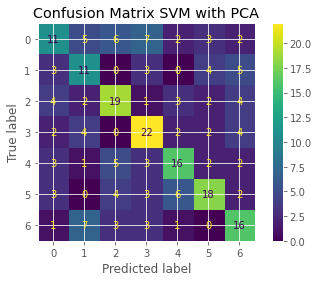


Classification Report =
               precision    recall  f1-score   support

           0       0.41      0.31      0.35        36
           1       0.37      0.42      0.39        26
           2       0.51      0.54      0.53        35
           3       0.52      0.61      0.56        36
           4       0.53      0.50      0.52        32
           5       0.58      0.50      0.54        36
           6       0.46      0.52      0.48        31

    accuracy                           0.49       232
   macro avg       0.48      0.49      0.48       232
weighted avg       0.49      0.49      0.48       232



In [ ]:
n = 38
pca = PCA(n_components=n)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])
clf_SVM = SVC(kernel='rbf', C=best_C).fit(X_train_pca, y_train)
y_pred_SVM = clf_SVM.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred_SVM)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title('Confusion Matrix SVM with PCA')
plt.show()
print("\nClassification Report =\n", classification_report(y_test, y_pred_SVM))

#KNN

In [ ]:
# KNN without PCA and finding the best k
accs = []
for k in range(1, 100):
    clf_KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accs.append(np.mean(cross_val_score(clf_KNN, X_train, y_train, cv=5)))
best_k = np.argmax(accs)+1
print('best k:', best_k)

clf_KNN = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
y_pred_KNN = clf_KNN.predict(X_test)
print("accuracy without PCA = %0.2f" % accuracy_score(y_test, y_pred_KNN))

best k: 1
accuracy without PCA = 0.46


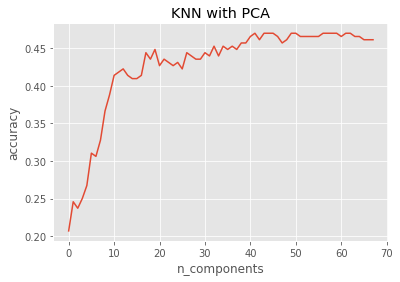

max accuracy with PCA = 0.47


In [ ]:
# KNN with PCA
accs = []
for n in range(1,len(X_train.columns)):
    pca = PCA(n_components=n)
    X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
    X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])

    clf_KNN = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_pca, y_train)
    y_pred_KNN = clf_KNN.predict(X_test_pca)
    accs.append(accuracy_score(y_test, y_pred_KNN))
plt.plot(accs)
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('KNN with PCA')
plt.show()
print("max accuracy with PCA = %0.2f" % np.max(accs))

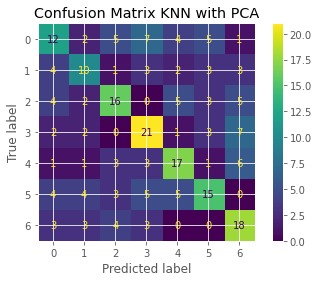


Classification Report =
               precision    recall  f1-score   support

           0       0.40      0.33      0.36        36
           1       0.42      0.38      0.40        26
           2       0.50      0.46      0.48        35
           3       0.50      0.58      0.54        36
           4       0.50      0.53      0.52        32
           5       0.50      0.42      0.45        36
           6       0.45      0.58      0.51        31

    accuracy                           0.47       232
   macro avg       0.47      0.47      0.47       232
weighted avg       0.47      0.47      0.47       232



In [ ]:
n = 50
pca = PCA(n_components=n)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])
clf_KNN = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_pca, y_train)
y_pred_KNN = clf_KNN.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred_KNN)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title('Confusion Matrix KNN with PCA')
plt.show()
print("\nClassification Report =\n", classification_report(y_test, y_pred_KNN))

#Random Forest

In [ ]:
# RF without PCA and finding the best depth
accs = []
for depth in range(1, 20):
    clf_RF = RandomForestClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    accs.append(np.mean(cross_val_score(clf_RF, X_train, y_train, cv=5)))
best_depth = np.argmax(accs)+1
print('best depth:', best_depth)

clf_RF = RandomForestClassifier(max_depth=best_depth, random_state=0).fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
print("accuracy without PCA = %0.2f" % accuracy_score(y_test, y_pred_RF))

best depth: 17
accuracy without PCA = 0.35


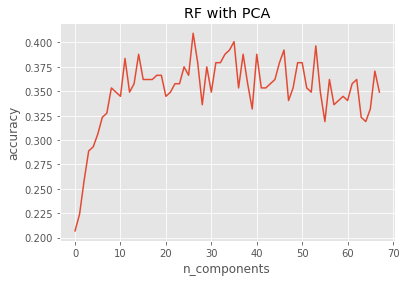

max accuracy with PCA = 0.41


In [ ]:
# RF with PCA
accs = []
for n in range(1,len(X_train.columns)):
    pca = PCA(n_components=n)
    X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
    X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])

    clf_RF = RandomForestClassifier(max_depth=best_depth, random_state=0).fit(X_train_pca, y_train)
    y_pred_RF = clf_RF.predict(X_test_pca)
    accs.append(accuracy_score(y_test, y_pred_RF))
plt.plot(accs)
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.title('RF with PCA')
plt.show()
print("max accuracy with PCA = %0.2f" % np.max(accs))

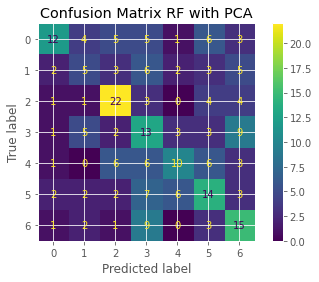


Classification Report =
               precision    recall  f1-score   support

           0       0.60      0.33      0.43        36
           1       0.26      0.19      0.22        26
           2       0.54      0.63      0.58        35
           3       0.27      0.36      0.31        36
           4       0.45      0.31      0.37        32
           5       0.36      0.39      0.37        36
           6       0.36      0.48      0.41        31

    accuracy                           0.39       232
   macro avg       0.41      0.39      0.38       232
weighted avg       0.41      0.39      0.39       232



In [ ]:
n = 15
pca = PCA(n_components=n)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=['PC'+str(i+1) for i in range(n)])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=['PC'+str(i+1) for i in range(n)])
clf_RF = RandomForestClassifier(max_depth=best_depth, random_state=0).fit(X_train_pca, y_train)
y_pred_RF = clf_RF.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred_RF)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.title('Confusion Matrix RF with PCA')
plt.show()
print("\nClassification Report =\n", classification_report(y_test, y_pred_RF))